<a href="https://colab.research.google.com/github/prabhupr70/DevTownSeeTheWorldThroughAI-ColabFiles-Day05/blob/main/ObjectDetection_Day05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See The World Thru AI

## Day 5: Build a simple Streamlit App
### [YouTube Video](https://www.youtube.com/live/5kTFVR6g3k8)
### [Attendance Form](https://forms.gle/BbuhsmZS94kUYspm6)
### Goal: Deploy YOLO model with a simple Streamlit UI.
*   Upload image or video
*   Display detection result

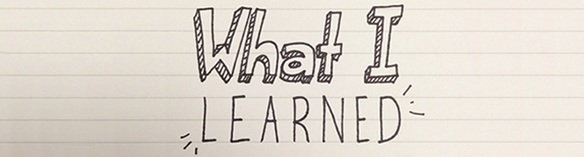
1.   Learned about 2 free image hosting sites (https://imgbb.com/, https://postimages.org/)
2.   

In [1]:
#*********************************************************
# Download & Install all Python packages/modules/libraries
# ultralytics: Used in YOLO. It constains predefined model
# opencv-python-headlesss: Without GUI how to do thr work using this package
# pillow: Image processing library
# pyngrok: Python nGrok package that allows you to expose your local network to the internet using a tunnel
#          Creates a way to pass from LOCVAL system on the web-server. It also lets you deploy it thru the tunnel.
#          In simple words, its lets you create a web-page from your local machine on the globally hosted webpage
# pandas: For Data Analysis
#*********************************************************
#opencv-python-headless matplotlib pillow
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [2]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

st.set_page_config(page_title="Object Detection (DevTown)", layout="wide")
background_url = "https://i.ibb.co/FqVqvBBN/web-back.png"

st.markdown(
   f"""
   <style>
   .stApp {{
       background: url("{background_url}") no-repeat center center fixed;
       background-size: cover;
   }}
   /* Sidebar styling */
   section[data-testid="stSidebar"] {{
       background: rgba(0, 0, 0, 0.3);
       backdrop-filter: blur(10px);
       border-radius: 12px;
       padding: 10px;
   }}
   /* File uploader styling */
   div[data-testid="stFileUploader"] {{
       background: rgba(0, 0, 0, 0.3);
       backdrop-filter: blur(10px);
       border-radius: 12px;
       padding: 15px;
   }}
   /* DataFrame styling */
   .stDataFrame {{
       background: rgba(255, 255, 255, 0.85);
       border-radius: 12px;
       padding: 10px;
       box-shadow: 0 4px 10px rgba(0,0,0,0.3);
   }}
   /* Dark text */
   h1, h2, h3, h4, h5, h6, p, label, span, div {{
       color: #1a1a1a !important;
       font-weight: 500;
   }}
   </style>
   """,
   unsafe_allow_html=True
)


st.title("Object Detection (DevTown)")


uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)


@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
   return YOLO(weights_path)


def save_uploaded_file(uploaded_file, suffix=""):
   suffix = suffix if suffix else Path(uploaded_file.name).suffix
   tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
   tf.write(uploaded_file.getbuffer())
   tf.flush()
   return tf.name


def annotate_and_table(results, model):
   res = results[0]
   try:
       plotted = res.plot()
       annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
   except Exception:
       annotated = res.orig_img if hasattr(res, "orig_img") else None


   detections = []
   try:
       boxes = res.boxes
       if boxes is not None and len(boxes) > 0:
           for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
               name = model.names[int(c)]
               detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})
   except:
       detections = []


   return annotated, pd.DataFrame(detections)


weights_to_load = "yolov8n.pt"
if uploaded_weights:
   weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
   st.sidebar.success("Using uploaded weights")


model = load_model(weights_to_load)


mode = st.radio("Select input", ["Image upload", "Video upload"])


if mode == "Image upload":
   uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])
   if uploaded:
       img = Image.open(uploaded).convert("RGB")
       st.image(img, caption="Input image")
       results = model.predict(np.array(img), conf=conf, imgsz=img_size)
       annotated, df = annotate_and_table(results, model)
       if annotated is not None:
           st.image(annotated, caption="Annotated")
       if not df.empty:
           st.dataframe(df)


elif mode == "Video upload":
   uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
   if uploaded_vid:
       tmp = save_uploaded_file(uploaded_vid)
       st.video(tmp)
       project_dir = tempfile.mkdtemp()
       results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
       try:
           out_dir = str(results[0].save_dir)
           vids = glob.glob(os.path.join(out_dir, "*"))
           vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
           if vids:
               st.success("Annotated video")
               st.video(vids[0])
       except:
           st.warning("Could not display annotated video")


Overwriting app_streamlit.py


In [ ]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "32lgzpBam07zWyCxH5oTkj2MiCw_3TyWZiFAoZsMRbjzMV9if"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501)
print("Public URL: ", public_url)

!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
    time.sleep(60)


Public URL:  NgrokTunnel: "https://1f3b0821b162.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.21.122:8501

2025-09-16 06:32:37.452 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 512x640 1 person, 54.2ms
Speed: 4.8ms preprocess, 54.2ms inference, 149.5ms postprocess per image at shape (1, 3, 512, 640)
2025-09-16 06:32:50.355 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_
